* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Model: "or_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]
[[0.1889503  0.81104964]
 [0.92919606 0.07080397]
 [0.99854654 0.00145337]
 [0.92422324 0.07577672]]
Wall time: 16.6 s


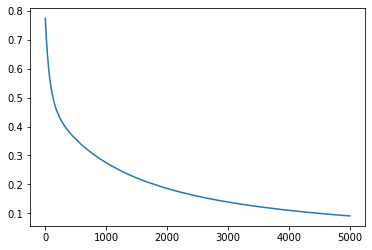

In [2]:
%%time
# 論理和を学習するためのデータを準備
x = np.array([[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])  # x1 と x2 の入力を 4パターン準備
y = np.array([[0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]])  # True/False の出力を準備

# ニューラルネットワークのモデルを作成 (サマリを表示)
or_model = tf.keras.models.Sequential(name='or_model') # ニューラルネットワークのモデルの箱を用意、add でレイヤ(層)等を順に追加していく
or_model.add(tf.keras.layers.Dense(input_dim=2, units=2, activation='softmax')) # 2入力のセルを2個用意、活性化関数はソフトマックス
or_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
or_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])  # 学習時の損失関数、最適化関数、評価関数を設定
history = or_model.fit(x, y, epochs=5000, verbose=0) # fit関数で学習を実施 (verbose= 1 or 2 とすると学習中のlossを表示)
plt.plot(history.history['loss']) # 学習中のlossの変化をグラフで表示

# 学習で利用したデータと、モデルで推測した結果を表示
print(x)
print(or_model.predict(x, verbose=0))